<a href="https://colab.research.google.com/github/BrunoPinos/FormationIngenieurMachineLearning/blob/main/P5_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [110]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# text
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from IPython.display import display, HTML

# Save objects
import joblib

# Set working directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/P5')

# Data table display for Pandas dataframes
from google.colab import data_table
%load_ext google.colab.data_table

# Import

**SQL**  
I get 50,000 posts for every 10,000,000, the posts retrieved have a score> 10 and are questions

for n in range(1, 7):  
SELECT Id, Body, Title, Tags  
FROM Posts  
WHERE (Score >= 10) AND (PostTypeId = 1) AND (Id < n * 10000000) AND (  
  Id >= (n - 1) * 10000000

**Read**

In [69]:
n_files = 6
list_files = [pd.read_csv('./Data/QueryResults (' + str(n+1) + ').csv',
                          index_col='Id') for n in range(n_files)]

df = pd.concat(list_files, axis=0)
df

,Body,Title,Tags
Id,,,
10000005,<blockquote>\n<p><strong>Possible Duplicate:</...,PHP Sort array by field?,<php><arrays><sorting>
10000020,<p>I am attempting to post form data to a goog...,AJAX post to google spreadsheet,<jquery><ajax><google-apps-script><google-sheets>
10000074,<p>I'm just starting to look into the world of...,Which FRP package to choose?,<haskell><frp><reactive-banana>
10000083,<p>I want to make an eventHandler that passes ...,Javascript event handler with parameters,<javascript><events><event-handling><handler>
10000226,<p>A string is called a square string if it ca...,Square Subsequence,<string><algorithm><dynamic-programming>
...,...,...,...
1213074,<p>I'm trying to drag data from the Winforms p...,"WinForms Interop, Drag & Drop from WinForms ->...",<wpf><winforms><interop><drag-and-drop>
1213127,<p>Is there a way for a Java program to detect...,Detect OS Sleep and Wake Up events in Java,<java><mysql><database-connection><sleep>
1213137,<p>I know I can change the UITableView propert...,Is there a way to remove the separator line fr...,<iphone><uitableview>


# Pretreatment

I create text with title + body.  
I follow transformations on 2 question.  

In [52]:
sample = np.random.choice(len(df), 2)

def random_display(docs, sample):
    for s in sample:
        print(docs.iloc[s], '\n'+'-'*20+'\n'*2)

In [53]:
texts = (df.Title + ' ' +df.Body)


random_display(texts, sample)

AudioHardware.cpp:1200:AudioObjectRemovePropertyListener: AudioObjectRemovePropertyListener: no object with given ID 0 <p>Working on a project in swift, where I'm trying to initiate the AVPlayer, and for some reason it trows me an exception saying </p>

<blockquote>
  <p>AudioHardware.cpp:1200:AudioObjectRemovePropertyListener: AudioObjectRemovePropertyListener: no object with given ID 0. </p>
</blockquote>

<p>I guess the issue is with my URL. Here is my code</p>

<pre><code>func initPlayer() {
    let url:NSURL = NSURL(string:"https://purelight1-163000.appspot.com/api/user/v2/media/track/60/sample")!
    self.playerItem = AVPlayerItem(url: url as URL)
    self.player=AVPlayer(playerItem: self.playerItem!)
    let playerLayer=AVPlayerLayer(player: self.player!)
    playerLayer.frame = CGRect(x: 0, y: 0, width: 10, height: 50) // actually this player layer is not visible
    self.view.layer.addSublayer(playerLayer)
}
</code></pre>
 
--------------------


XML attribute vs XML element <

The first part of our job is to clean up the text

1.   Remove superfluous parts: code parts, HTML tags, punctuation... 
2.   Create tokens: i.e. separate their text for each document into a list of  words
3.   Remove stopwords: words considered too common to be interesting in our analysis
4.   Lemmatize: transform all the words into a basic form whatever the form in which it appears in the document (plural, conjugated verb, feminine form ...)

In [54]:
# Lemmatization function
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(doc, nlp, banned_postags=['PUNCT', 'DET', 'PRON', 'CONJ',
                                            'ADV', 'INTJ']):
    doc = nlp(doc)
    return " ".join(
        [token.lemma_ for token in doc if token.pos_ not in banned_postags])
    

# Remove stopwords
stop_words = stopwords.words('english')

# stop_words.extend([])
def remove_stopwords(doc):
    return [word for word in doc if word not in stop_words] 


# All processing
texts_cleaned = (texts
                 # delete code parts
                 .apply(lambda x: re.sub('<code>(.|\n)*?</code>', '', x))
                  # remove HTML tags
                 .apply(lambda x: re.sub('<[^<]+?>', '', x))
                 .apply(lambda x: lemmatization(x, nlp=nlp))
                 .apply(lambda x: simple_preprocess(x, min_len=1, deacc=False))
                 .apply(remove_stopwords)
                )

random_display(texts_cleaned, sample)

['audiohardware', 'cpp', 'object', 'give', 'id', 'working', 'project', 'swift', 'try', 'initiate', 'avplayer', 'reason', 'trow', 'exception', 'say', 'audiohardware', 'cpp', 'object', 'give', 'id', 'guess', 'issue', 'url', 'code'] 
--------------------


['xml', 'attribute', 'vs', 'xml', 'element', 'work', 'ask', 'create', 'xml', 'file', 'pass', 'datum', 'offline', 'application', 'create', 'second', 'xml', 'file', 'pass', 'order', 'update', 'datum', 'process', 'discuss', 'team', 'application', 'structure', 'xml', 'file', 'sample', 'come', 'like', 'team', 'say', 'industry', 'standard', 'attribute', 'use', 'meta', 'datum', 'suggest', 'reason', 'suggest', 'first', 'size', 'file', 'create', 'small', 'item', 'file', 'transfer', 'suggestion', 'reality', 'turn', 'three', 'time', 'large', 'one', 'suggest', 'search', 'mysterious', 'industry', 'standard', 'mention', 'close', 'could', 'find', 'xml', 'attribute', 'use', 'meta', 'datum', 'say', 'debate', 'meta', 'datum', 'wind', 'explanation', 'dete

In our selected examples, we observe a much smaller number of remaining words, compared to the raw documents.

Now is the time to normalize our text, namely to put it in a format in which our model will be able to understand it. To do this, we will first create a dictionary which will assign a unique identifier to each word present in all the documents. We also display the number of words present in this dictionary

In [55]:
dictionary = Dictionary(texts_cleaned)
print("Taille du dictionnaire: ",len(dictionary))

Taille du dictionnaire:  146368


In order to make sure that these words can help us at least to find interesting patterns in our data at the time of modeling, we remove from the dictionary the words which do not appear in at least 50 different documents.

In [56]:
dictionary.filter_extremes(no_below=50)
print("Taille du dictionnaire: ", len(dictionary))

Taille du dictionnaire:  25293


With this filtering, we have removed more than 80% of the words in the dictionary, which could have been a source of noise once they became descriptors. Also, in order not to have too common words (like stopwords), let's take a look at the most common items

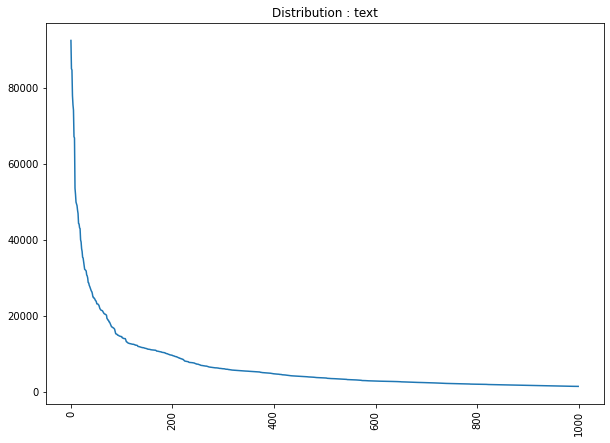

In [104]:
words_sorted = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
id2token = {value: key for key, value in dictionary.token2id.items()}

list_count = [count for e, (i, count) in enumerate(words_sorted[:1000])]
fig = plt.figure(1, figsize=(10, 7))
sn.lineplot(x = range(0, 1000), y = list_count)
plt.xticks(rotation=90)
plt.title('Distribution : text')
plt.show()

In [103]:
print("Mots les plus fréquents du dictionnaire:")
for e, (i, count) in enumerate(words_sorted[:50]):
    print(f"{e+1:2} {id2token[i]:15} {count:5}")

Mots les plus fréquents du dictionnaire:
 1 get             92424
 2 like            84996
 3 try             84652
 4 work            77955
 5 code            75515
 6 would           74111
 7 want            67132
 8 way             66774
 9 find            53580
10 error           51956
11 one             49899
12 need            49386
13 file            48978
14 follow          47795
15 know            46916
16 run             44287
17 make            44164
18 example         43150
19 create          42944
20 see             39999
21 problem         39437
22 look            37681
23 seem            36941
24 add             35399
25 question        35220
26 could           34243
27 set             33198
28 call            32257
29 change          32121
30 time            31984
31 new             31790
32 function        30763
33 method          30534
34 value           29965
35 thank           28751
36 app             28674
37 help            28037
38 give            27731
39 c     

We decide to delete the 100 most frequent words.


In [105]:
to_delete = [id2token[i] for e, (i, count) in enumerate(words_sorted[:100])]
bad_ids = [dictionary.token2id[token] for token in to_delete]

dictionary.filter_tokens(bad_ids=bad_ids)

And finally, to conclude our pre-processing part, we create our bag of words. This representation makes it possible to count the number of occurrences of each word in the dictionary for each document. The resulting dataframe will serve as input data to our model

In [106]:
corpus = texts_cleaned.apply(dictionary.doc2bow)
random_display(corpus, sample)

[(222, 1), (228, 1), (450, 1), (1018, 1), (1330, 2), (1489, 1), (2333, 1), (3053, 1), (3572, 2), (11806, 1), (21355, 1)] 
--------------------


[(8, 1), (11, 2), (15, 1), (18, 1), (37, 1), (86, 2), (94, 2), (121, 1), (131, 1), (142, 1), (226, 1), (228, 1), (237, 1), (288, 1), (337, 4), (425, 1), (441, 3), (552, 1), (568, 1), (600, 1), (629, 1), (674, 2), (702, 1), (787, 1), (815, 1), (897, 1), (989, 1), (1040, 1), (1125, 7), (1203, 1), (1515, 1), (2744, 4), (2811, 1), (3556, 2), (4104, 1), (4750, 1), (8013, 1), (9788, 1), (11168, 2)] 
--------------------




I save my objects

In [111]:
joblib.dump(corpus, 'corpus.sav')
joblib.dump(dictionary, 'dictionary.sav')
joblib.dump(df, 'df.sav')
joblib.dump(texts_cleaned, 'texts_cleaned.sav')

['texts_cleaned.sav']